# Experiment 2

Preliminary experiment using foot and hand sensors

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import csv
import skfuzzy as fuzz
from sklearn.cluster import KMeans

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [8]:
#Get data from all pacients

# pacients = ["01/01", "02/02", "03/03", "04/04", "05/05", "06/06", "07/07", "08/08"]
pacients = ["01/01"]

velocities = ["08"]

repetitions = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10"]

frames = []

for pacient in pacients:
    for velocity in velocities:
        for index in repetitions:
            data_location = './../data/'+pacient+'_Gang_'+ velocity + '_' + index + '.csv'
            read_data = pd.read_csv(data_location, engine='python', sep=None)
            new_data = pd.DataFrame(read_data)
            frames.append(new_data)
            
result = pd.concat(frames)
len(result)

/home/mariana/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



14800

In [3]:
# Get only columns
columns_names = ['Upper spine Accel Earth X,mG', 'Upper spine Accel Earth Y,mG', 'Upper spine Accel Earth Z,mG',
                 'RT Foot Accel Earth X,mG', 'RT Foot Accel Earth Y,mG', 'RT Foot Accel Earth Z,mG']
result = result.loc[:, columns_names]

result

# data = []

# result.loc[:, 'Upper spine Accel Earth X,mG']

# data.append(result.loc[:, 'Upper spine Accel Earth X,mG'])
# data.append(result.loc[:, 'Lower spine Accel Earth X,mG'])

# data

,"Upper spine Accel Earth X,mG","Upper spine Accel Earth Y,mG","Upper spine Accel Earth Z,mG","RT Foot Accel Earth X,mG","RT Foot Accel Earth Y,mG","RT Foot Accel Earth Z,mG"
0,12.950600,-7.902240,0.942105,11.886500,5.128990,-2.382190
1,-9.703270,-14.451900,-3.506060,-3.816780,4.310530,8.313350
2,-8.494380,-24.978000,6.189270,-10.032700,-7.038720,-2.041870
3,-6.867520,-24.688200,3.565690,-30.316100,-10.258000,2.430800
4,-2.610690,-22.664300,14.477400,-18.538600,-14.132000,-0.048616
5,-13.021300,-8.517540,3.577610,-2.399120,-2.619060,5.833930
6,-15.908500,-22.140500,7.572620,33.042400,16.641900,0.632009
7,-29.386300,-37.365300,13.070200,35.332400,19.915800,0.437545
8,-21.271300,-43.645400,18.257800,25.626900,9.439520,-2.868350
9,-33.398800,-41.499500,9.444900,-3.162470,14.623100,5.736700


In [4]:
# Get only columns
# columns_names = ['Upper spine Accel Earth X,mG', 'Upper spine Accel Earth Y,mG', 'Upper spine Accel Earth Z,mG',
#                  'Lower spine Accel Earth X,mG', 'Lower spine Accel Earth Y,mG', 'Lower spine Accel Earth Z,mG', 
#                  'LT Shank Accel Earth X,mG', 'LT Shank Accel Earth Y,mG', 'LT Shank Accel Earth Z,mG',
#                  'RT Shank Accel Earth X,mG', 'RT Shank Accel Earth Y,mG', 'RT Shank Accel Earth Z,mG']
# result = result.loc[:, columns_names]
# result

In [5]:
def cluster(som, n_clusters=2):
    cl_labels = KMeans(n_clusters=n_clusters).fit(
        som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    )
    return cl_labels

In [7]:
data = result.values
mapsize = [50,50]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice="rect", normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som.train(n_job=4, verbose='debug', train_rough_len=1000)

array([[  12.9506  ,   -7.90224 ,    0.942105,   11.8865  ,    5.12899 ,
          -2.38219 ],
       [  -9.70327 ,  -14.4519  ,   -3.50606 ,   -3.81678 ,    4.31053 ,
           8.31335 ],
       [  -8.49438 ,  -24.978   ,    6.18927 ,  -10.0327  ,   -7.03872 ,
          -2.04187 ],
       ...,
       [-132.9     ,   11.255   ,    9.23029 ,  -19.9432  ,   62.2242  ,
          16.3738  ],
       [-150.781   ,    1.38244 ,   10.0705  ,  -22.1448  ,   52.964   ,
          14.7685  ],
       [-136.857   ,   11.0269  ,   -6.98542 ,  -34.9654  ,   57.5377  ,
          29.002   ]])

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_po

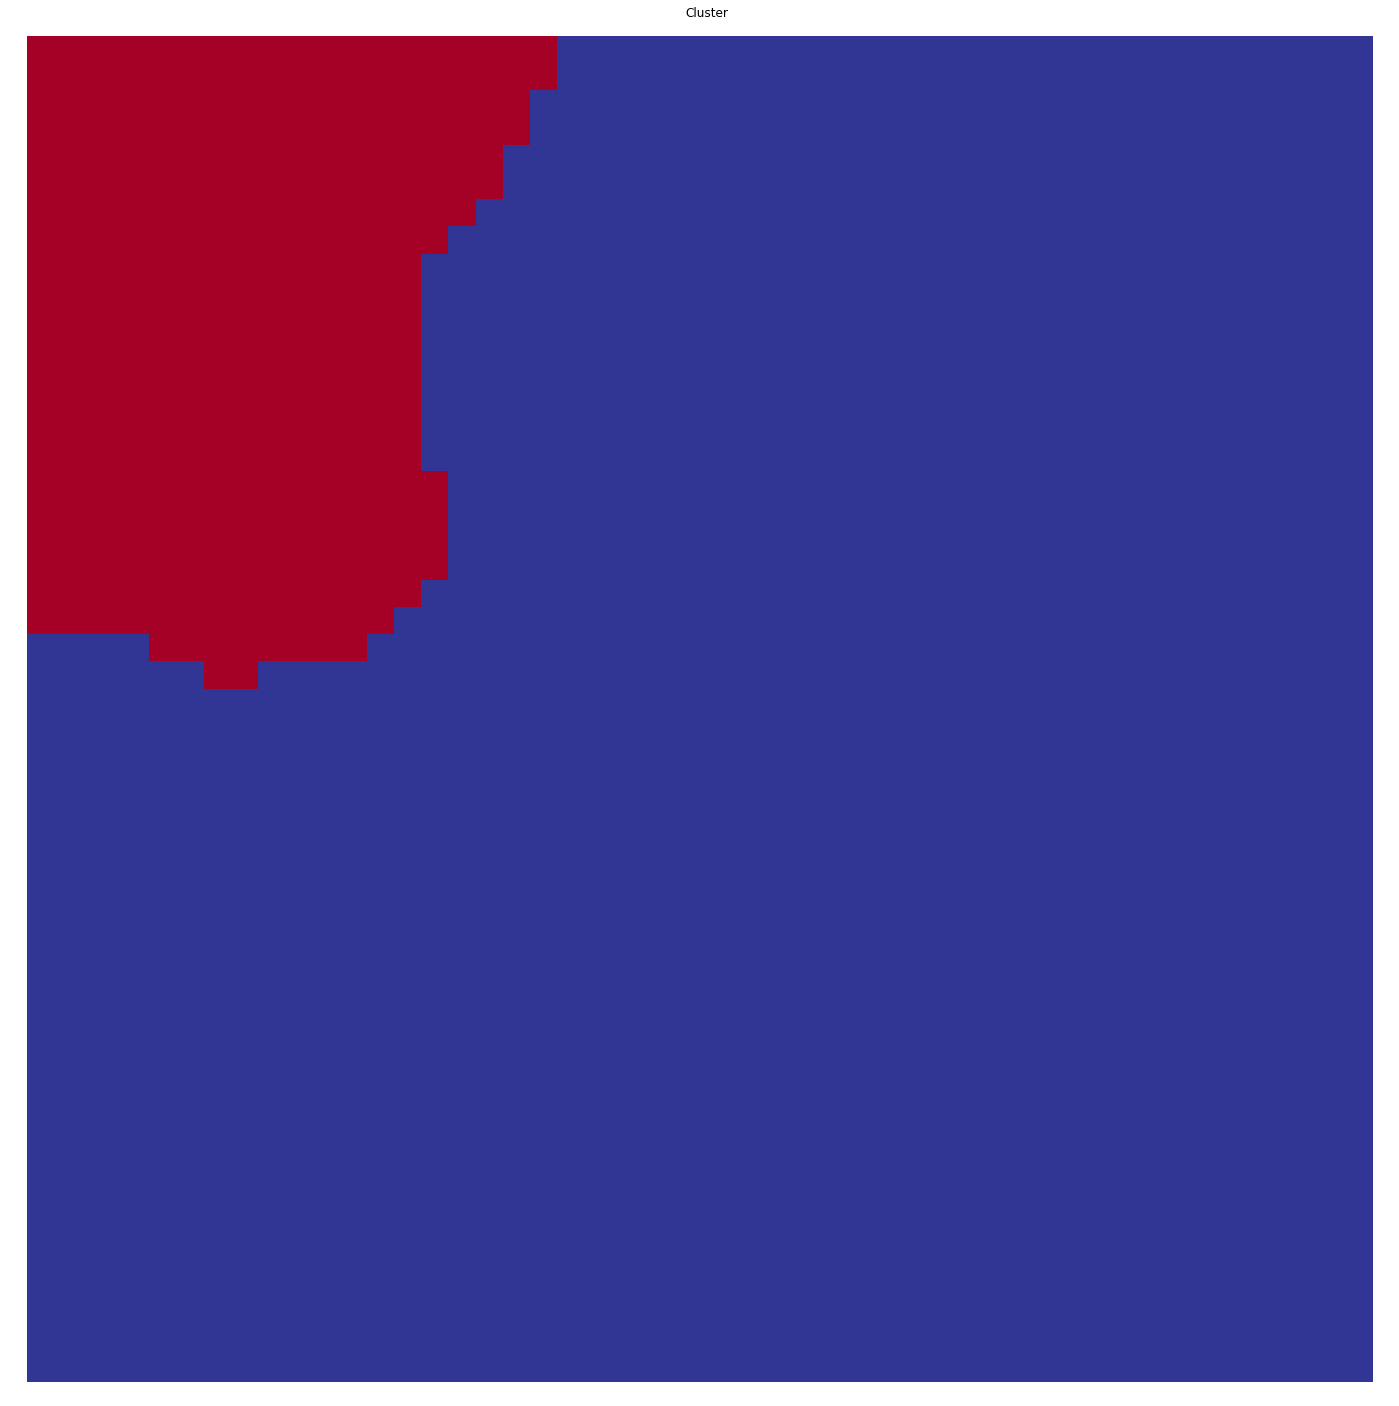

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f2efe794390>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f2efe794390>
Setting pcolormesh
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=7.0 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


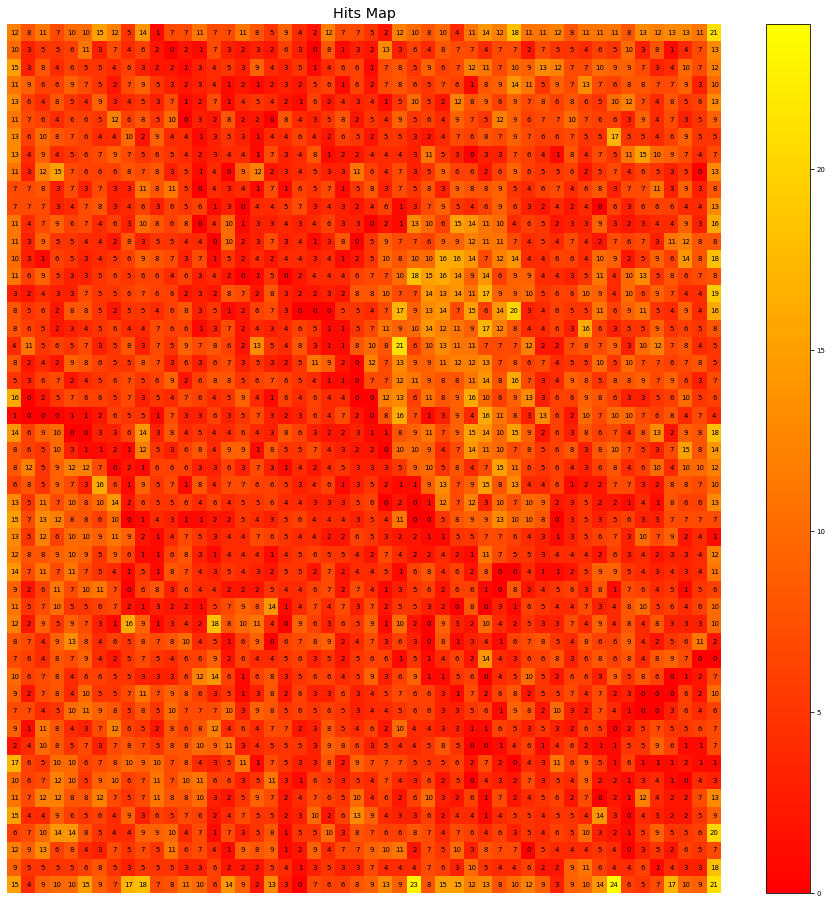

In [7]:
# Visualization Plots
som.cluster(2)
vis  = sompy.mapview.View2DPacked(5, 5, 'Cluster',text_size=12)  
kmeans_labels = cluster(som, n_clusters=2)
som.cluster_labels = kmeans_labels.labels_

vis.show(som, what='cluster')

from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

update_title_pos
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.4 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


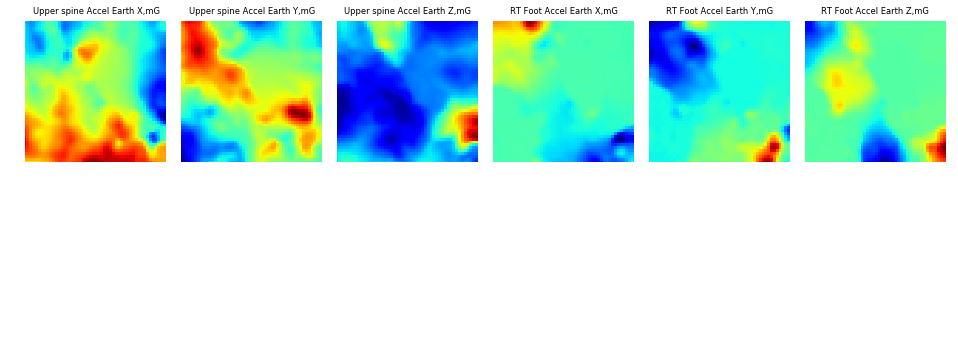

In [8]:
#Generate maps
som.component_names = columns_names
v  = sompy.mapview.View2DPacked(10, 10, '',text_size=7)
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


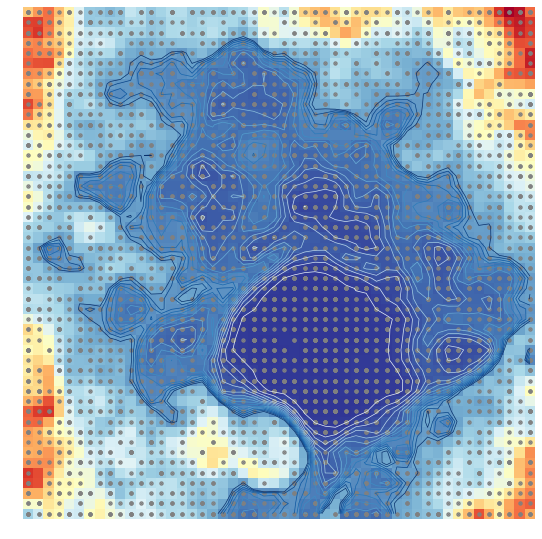

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1c7643c278>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1c7643c278>
Setting pcolormesh
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


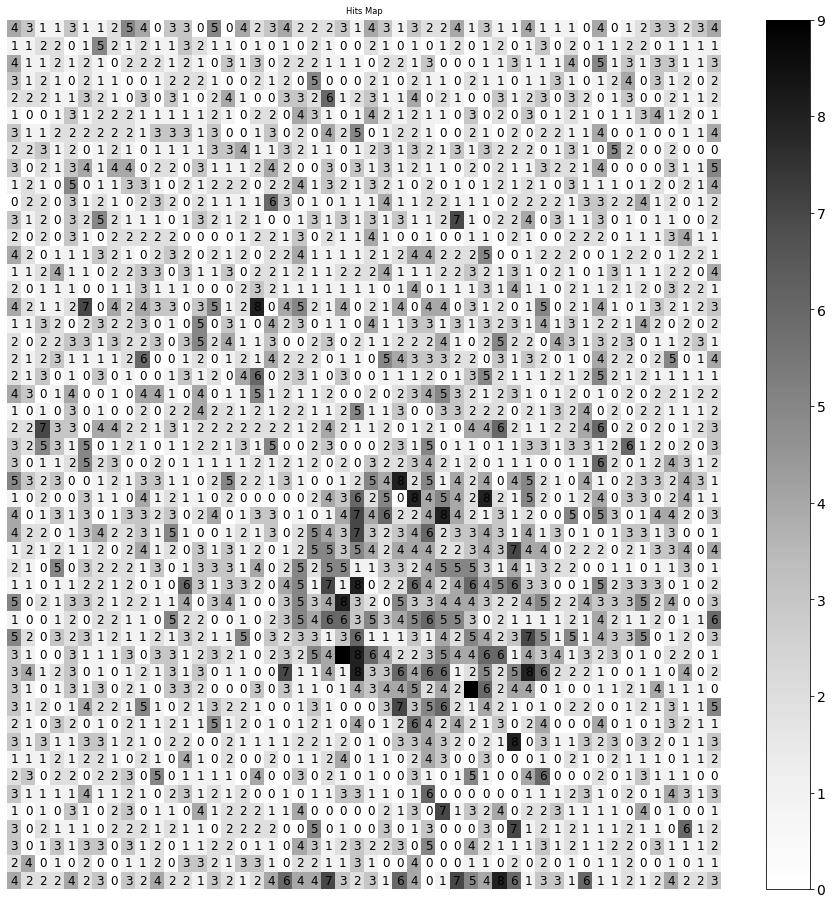

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


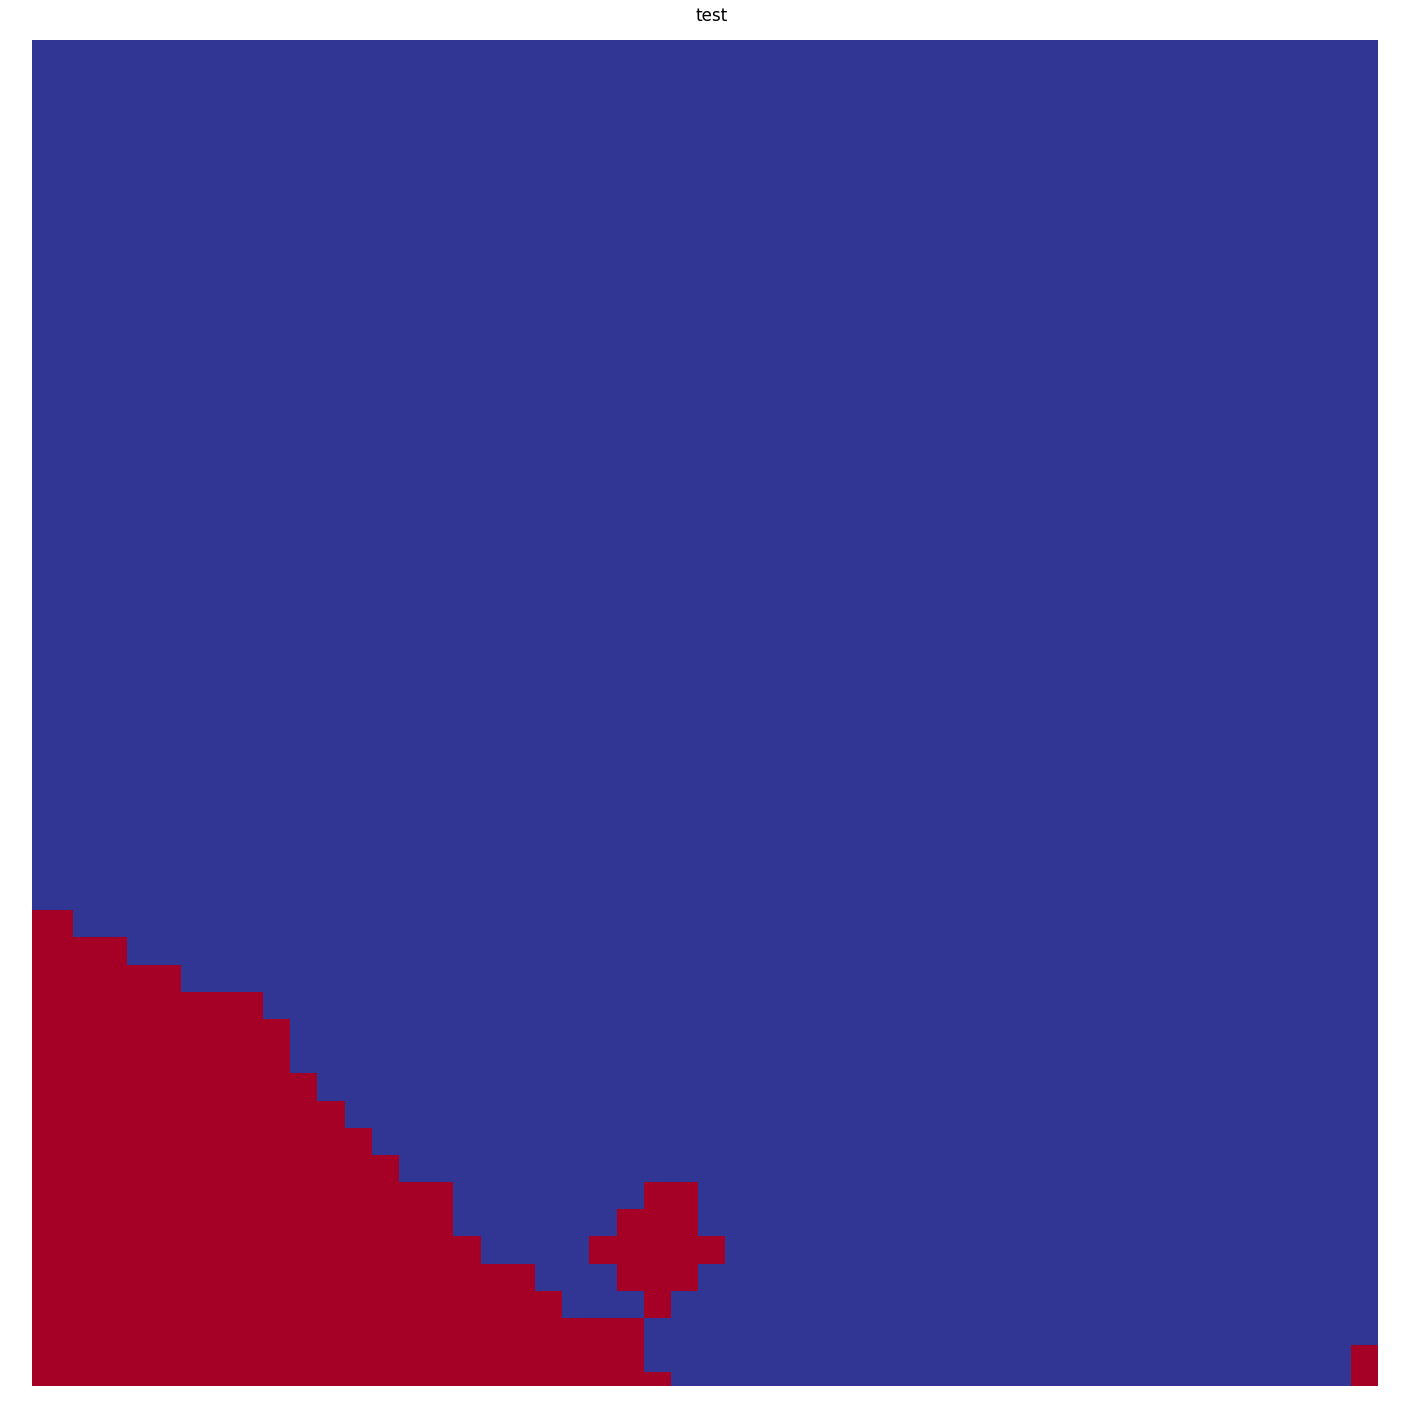

In [143]:
umat = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat.show(som)

from sompy.visualization.bmuhits import BmuHitsView
bmuhits  = BmuHitsView(50,50,"Hits Map",text_size=14)
bmuhits.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

v  = sompy.mapview.View2DPacked(10, 10, 'test',text_size=12)  
som.cluster(n_clusters=2)
v.show(som, what='cluster')